# Welcome to the Alpaca Google Colab Instant Development Environment! 

Alpaca offers free live and historical market data for stocks and cryptocurrencies, and also offers free paper and live trading environments. These services are accessed by API and you can use them for a variety of things, like research and backtesting using market data, paper trading crypto, etc. 

This notebook allows you to quickly get started with Alpaca and start exploring what you can build. 

You can use this notebook to research new ideas, backtest them and even place trades.


# Table of Contents
1. [Introduction](#first-bullet)
2. [Accessing Market Data](#second-bullet)
3. [Backtesting](#third-bullet)
4. [Paper Trading](#fourth-bullet)

# Introduction <a class="anchor" id="first-bullet"></a>

To follow along, you'll need to use your Alpaca API paper keys.

If you don't have keys, sign up here:
[Free Stock and Crypto Data with $0 Commission Trading](https://app.alpaca.markets/signup)

You can find your keys on your [dashboard](https://app.alpaca.markets/paper/dashboard/overview). If you're having trouble finding your keys, follow [this tutorial](https://alpaca.markets/learn/connect-to-alpaca-api/). 

In [ ]:
API_KEY = 'APCA-API-SECRET-KEY'
SECRET_KEY = 'APCA-API-SECRET-KEY'

Now we can get started! We will need to import `alpaca_trade_api`. 

If we haven't installed it yet, we can do so by running `pip install alpaca_trade_api`.

Then let's define an instance of the REST API interface and provide it our API keys.

In [ ]:
%%capture
!pip install alpaca_trade_api
!pip install backtrader
!pip install matplotlib==3.2.2
!pip install plotly

In [ ]:
# An issue with how colab deals with imports using PyYAML==6.0 is causing errors when importing
# plotly.express. Here we'll downgrade for a quick, temporary fix.
!pip install pyyaml==5.4.1

In [ ]:
from alpaca_trade_api.rest import REST, TimeFrame
from alpaca_trade_api.stream import Stream

rest_api = REST(API_KEY, SECRET_KEY, 'https://paper-api.alpaca.markets')

# Accessing Market Data  <a class="anchor" id="second-bullet"></a>

The REST API allows you to access historical market data, account data, and place trades.

Here are some of the types of the market data Alpaca offers:
*   Bar data is available in custom timeframes (1 day, 30 mins, 5 mins, etc)
*   Quote and Trade data is also available

Let's take a look at daily bar data for Bitcoin during the year of 2021.

In [ ]:
# Retrieve daily bar data for Bitcoin in a DataFrame 
btc_bars = rest_api.get_crypto_bars('BTCUSD', TimeFrame.Day, '2021-01-01', '2022-01-01').df
btc_bars

# Quote and trade data are also available for cryptocurrencies
# btc_quotes = rest_api.get_crypto_quotes('BTCUSD', '2021-01-01', '2021-01-05').df
# btc_trades = rest_api.get_crypto_trades('BTCUSD', '2021-01-01', '2021-01-05').df

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2021-01-01 06:00:00+00:00,CBSE,29413.29,29683.50,29039.00,29683.03,4431.837894,44893,29419.838845
2021-01-01 06:00:00+00:00,FTXU,29225.00,29631.00,28750.00,29631.00,25.076500,211,29330.826766
2021-01-02 06:00:00+00:00,CBSE,32222.88,34205.00,32008.62,33779.48,7955.017558,87151,33089.671665
2021-01-02 06:00:00+00:00,FTXU,29585.00,34172.50,29566.50,33666.50,237.162400,1742,32113.173543
2021-01-03 06:00:00+00:00,CBSE,33082.83,33666.99,32453.37,32903.87,7401.195215,77379,33140.775678
...,...,...,...,...,...,...,...,...
2021-12-31 06:00:00+00:00,ERSX,47104.70,48578.90,45778.00,47284.40,96.188100,144,47056.549446
2021-12-31 06:00:00+00:00,FTXU,47277.00,48569.00,45663.00,47185.00,1659.854800,7641,46884.004613
2022-01-01 06:00:00+00:00,CBSE,47188.00,47951.21,46690.00,47093.40,6118.650421,298030,47295.920139


Using Jupyter notebooks allow you to easily visualize data and test ideas. 

For example, we can use plotly to make beautiful candle charts of Bitcoins's daily bar data. 

We can also calculate the 13 day simple moving average (SMA) for Bitcoin over that period using pandas operations, and add it onto our chart.

In [ ]:
# plotly imports
import plotly.graph_objects as go
import plotly.express as px

# SPY bar data candlestick plot
candlestick_fig = go.Figure(data=[go.Candlestick(x=btc_bars.index,
                open=btc_bars['open'],
                high=btc_bars['high'],
                low=btc_bars['low'],
                close=btc_bars['close'])])

# Calculating 13 day SMA using pandas rolling mean
sma = btc_bars['close'].rolling(13).mean().dropna()

# Creating a line plot for our sma
sma_fig = px.line(x=sma.index, y=sma)

# Adding both plots onto one chart
fig = go.Figure(data=candlestick_fig.data + sma_fig.data)

# Adding a title and axes labels
fig.update_layout(
    title="Price of Bitcoin during the year of 2021",
    xaxis_title="Date (days)",
    yaxis_title="Price ($USD)",
)

# Displaying our chart
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


#Backtesting  <a class="anchor" id="third-bullet"></a>

We can use backtrader along with Alpaca’s Market Data API to backtest a strategy’s performance with historical data. Backtrader allows you to focus on writing reusable trading strategies, indicators and analyzers instead of having to spend time building infrastructure. 

Below we've written a function that allows you to easily backtest a strategy written in backtrader. The function takes in as a parameter the strategy you wish to backtest, the symbols the strategy trades on, start and end dates of the backtest, the timeframe of the strategy, and the initial cash of the backtest. 


In [ ]:
import backtrader as bt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

def run_backtest(strategy, symbols, start, end, timeframe=TimeFrame.Day, cash=10000):
 """params:
       strategy: the strategy you wish to backtest, an instance of backtrader.Strategy
       symbols: the symbol (str) or list of symbols List[str] you wish to backtest on
       start: start date of backtest in format 'YYYY-MM-DD'
       end: end date of backtest in format: 'YYYY-MM-DD'
       timeframe: the timeframe the strategy trades on (size of bars) -
                   1 min: TimeFrame.Minute, 1 day: TimeFrame.Day, 5 min: TimeFrame(5, TimeFrameUnit.Minute)
       cash: the starting cash of backtest
 """

 # initialize backtrader broker
 cerebro = bt.Cerebro(stdstats=True)
 cerebro.broker.setcash(cash)

 # add strategy
 cerebro.addstrategy(strategy)

 # add analytics
 # cerebro.addobserver(bt.observers.Value)
 # cerebro.addobserver(bt.observers.BuySell)
 cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='mysharpe')
  # historical data request
 if type(symbols) == str:
   symbol = symbols
   alpaca_data = rest_api.get_crypto_bars(symbol, timeframe, start, end).df
   data = bt.feeds.PandasData(dataname=alpaca_data, name=symbol)
   cerebro.adddata(data)
 elif type(symbols) == list or type(symbols) == set:
   for symbol in symbols:
     alpaca_data = rest_api.get_crypto_bars(symbol, timeframe, start, end).df
     data = bt.feeds.PandasData(dataname=alpaca_data, name=symbol)
     cerebro.adddata(data)


 # run
 initial_portfolio_value = cerebro.broker.getvalue()
 print(f'Starting Portfolio Value: {initial_portfolio_value}')
 results = cerebro.run()
 final_portfolio_value = cerebro.broker.getvalue()
 print(f'Final Portfolio Value: {final_portfolio_value} ---> Return: {(final_portfolio_value/initial_portfolio_value - 1)*100}%')

 strat = results[0]
 print('Sharpe Ratio:', strat.analyzers.mysharpe.get_analysis()['sharperatio'])
 cerebro.plot(iplot= False)


## Backtesting Example 1: Simple Moving Average Crossover

Below is an example of a simple backtrader strategy. It is a simple moving average crossover strategy which trades when the 13 day SMA crosses over the 25 day SMA, and sells when it crosses under.  In this example, a crossover indicator is created which is 1 when the fast SMA crosses over the slow SMA, -1 when the fast crosses below the slow, and 0 if there is no crossover.

Take note of the structure of the strategy. We can define parameters for the strategy in the `params` dictionary. Any indicators can be defined in `__init__`. You can find a full list of indicators in the backtrader documentation. The `next()` method is called each iteration of the backtest. 


At the end you can run `run_backtest(SmaCross, 'BTCUSD', '2019-01-01', '2021-11-01', TimeFrame.Day, 10000)`, which will compute the backtest and output the results.



Starting Portfolio Value: 10000
Final Portfolio Value: 19321.17 ---> Return: 93.21169999999998%
Sharpe Ratio: 0.8163456239852777


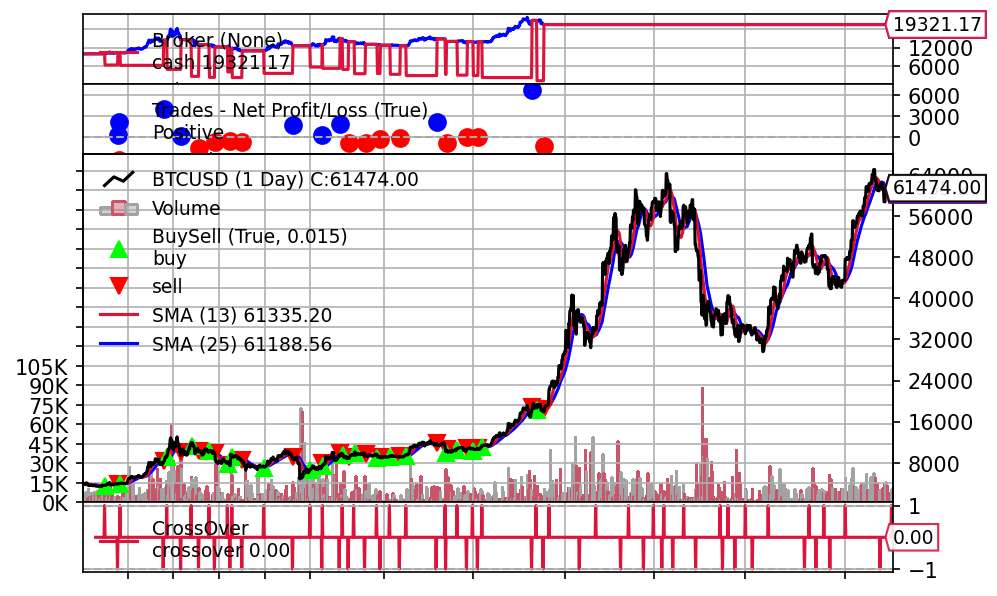

In [ ]:
class SmaCross(bt.Strategy):
  
  # list of parameters which are configurable for the strategy
    params = dict(
        pfast=13,  # period for the fast moving average
        pslow=25   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal
  
    def next(self):
        if not self.position and self.crossover > 0:  # not in the market
            self.buy()
           
        elif self.position and self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


run_backtest(SmaCross, 'BTCUSD', '2019-01-01', '2021-11-01', TimeFrame.Day, 10000)

## Backtesting Example 2: Crypto Portfolio

Another class of strategies are rebalancing strategies. These strategies attempt to match a desired portfolio. Some rebalancing strategies change the securities in their portfolio based on market conditions, while others maintain a steady allocation through all conditions.

We'll create our own rebalancing strategy by creating a portfolio made from a subset of the most valuable coins available. This strategy aims to keep the same allocation of assets throughout our entire backtest period.

We'll create the portfolio by allocating to these cryptocurrencies:
* 35% Bitcoin (BTCUSD)
* 35% Ethereum (ETHUSD)
* 15% Solana (SOLUSD)
* 7.5% Dogecoin (DOGEUSD)
* 7.5% Litecoin (LTCUSD)


Starting Portfolio Value: 10000
Final Portfolio Value: 103641.690561 ---> Return: 936.41690561%
Sharpe Ratio: 0.9874501303813163


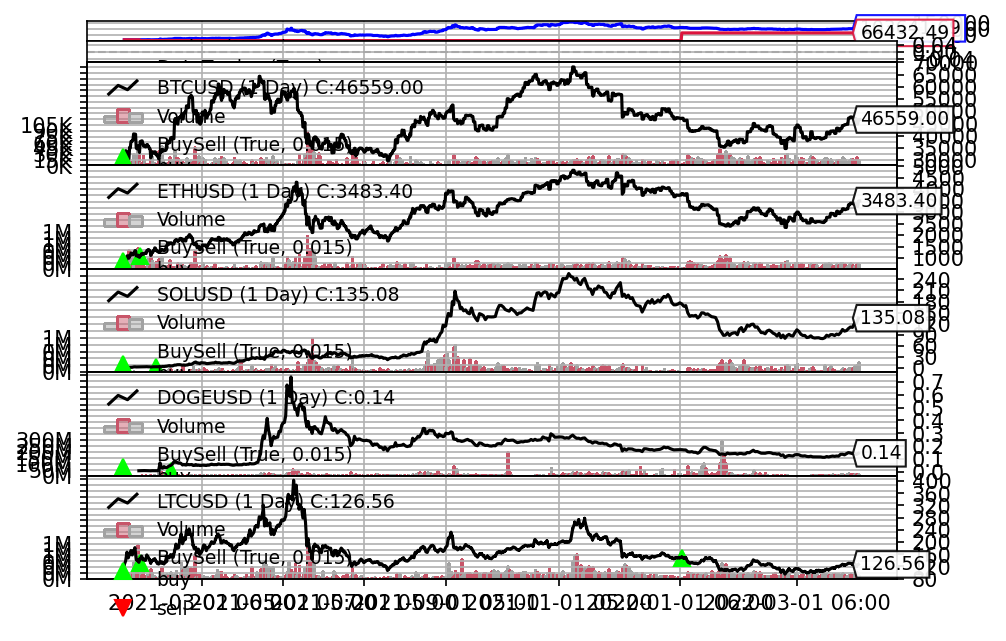

In [ ]:
class CryptoRebalance(bt.Strategy):

   def __init__(self):
       # the last year we rebalanced (initialized to -1)
       self.year_last_rebalanced = -1 
       self.weights = { "BTCUSD" : 0.35 , "ETHUSD" : 0.35, "SOLUSD": 0.15, "DOGEUSD" : 0.075, "LTCUSD" : 0.075 }

   def next(self):
       # if we’ve already rebalanced this year
       if self.datetime.date().year == self.year_last_rebalanced:
           return
       # update year last balanced
       self.year_last_rebalanced = self.datetime.date().year
       # enumerate through each security
       for i,d in enumerate(self.datas):
           # rebalance portfolio with desired target percents
           symbol = d._name
           self.order_target_percent(d, target=self.weights[symbol])

        
symbols = ["BTCUSD", "ETHUSD", "SOLUSD", "DOGEUSD", "LTCUSD"]
run_backtest(CryptoRebalance, symbols , '2021-01-01', '2022-04-01', TimeFrame.Day, 10000)

# Paper Trading  <a class="anchor" id="fourth-bullet"></a>

We can use Alpaca’s trade API to place paper trades on our Alpaca account. Paper trading is free and doesn’t require you to fund your account. Let’s place trades so that we can create the example crypto portfolio in our paper account.





In [ ]:
import random 

percent_allocations = { "BTCUSD" : 0.35 , "ETHUSD" : 0.35, "SOLUSD": 0.15, "DOGEUSD" : 0.075, "LTCUSD" : 0.075 }
max_qty_precision = {"BTCUSD" : 4 , "ETHUSD" : 3, "SOLUSD": 2, "DOGEUSD" : 0, "LTCUSD" : 2 }

# liquidate all existing positions before rebalancing
rest_api.close_all_positions()

# get available cash
available_cash = float(rest_api.get_account().cash)

# how many dollars we want to allocate to each symbol
dollar_value_allocations = {symbol: percent * available_cash for symbol, percent in percent_allocations.items()}

# Rebalance portfolio
for symbol, dollars_alloc in dollar_value_allocations.items():
     
    # market price of current ETF
    market_price = rest_api.get_latest_crypto_bar(symbol, exchange="FTXU").close
    
    # how many shares we want, rounded to the most allowed decimal places
    target_holdings = round(dollars_alloc / market_price, max_qty_precision[symbol])
     
    # how many shares we have to buy to match target
    order_quantity = target_holdings
     
    # submit market order for this ETF
    print(f"Submitting market order for {order_quantity} units of {symbol}")

    rest_api.submit_order(symbol, order_quantity, 'buy', 'market', client_order_id=f'cryptoc_{random.randrange(10000000)}')

Submitting market order for 2.8218 units of BTCUSD
Submitting market order for 52.729 units of ETHUSD
Submitting market order for 707.87 units of SOLUSD
Submitting market order for 195090.0 units of DOGEUSD
Submitting market order for 235.11 units of LTCUSD
